## Visualização e pré-processamento

A seguir, a implementação de cada um dos filtros: passa-faixa (bandpass), passa-baixa (lowpass), passa-alta (highpass) e corta-faixa (notch).

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
from sklearn.preprocessing import LabelEncoder
import mne


# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=512, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=512, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=512, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=512, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

Para imprimir os dados no domínio da frequência, foi utilizado a função `matplotlib.pyplot.psd` que na verdade utiliza a transformação dos dados por FFT, porém aplica uma característica que evidencia a "energia" dos dados, chamado de PSD (_Power Spectrum Density_)

Definição de função para imprimir os dados no domínio do tempo e da frequência:

In [5]:
def print_graphs(data):
    for i in range(0, 21, 3):
        plt.plot(data[i,:])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(0, 21, 3):
        plt.psd(data[i,:], Fs=512)
    plt.title('Domínio da frequência')
    plt.show()

    for i in range(0, 21, 3):
        plt.specgram(data[i,:], Fs=512)
    plt.title('Domínio da frequência')
    plt.show()

Carregamento dos dados de um participante da base de dados AVI:

In [6]:
data = np.load("datasets/avi/single/data_sub1.npy")
print(data.shape)

# Transpondo dados para organizar os dados na última dimensão
data = data.T
data.shape

(4, 21, 15360)


(15360, 21, 4)

Visualização do sinal em todos os domínios apresentados, sem a aplicação de nenhum filtro:

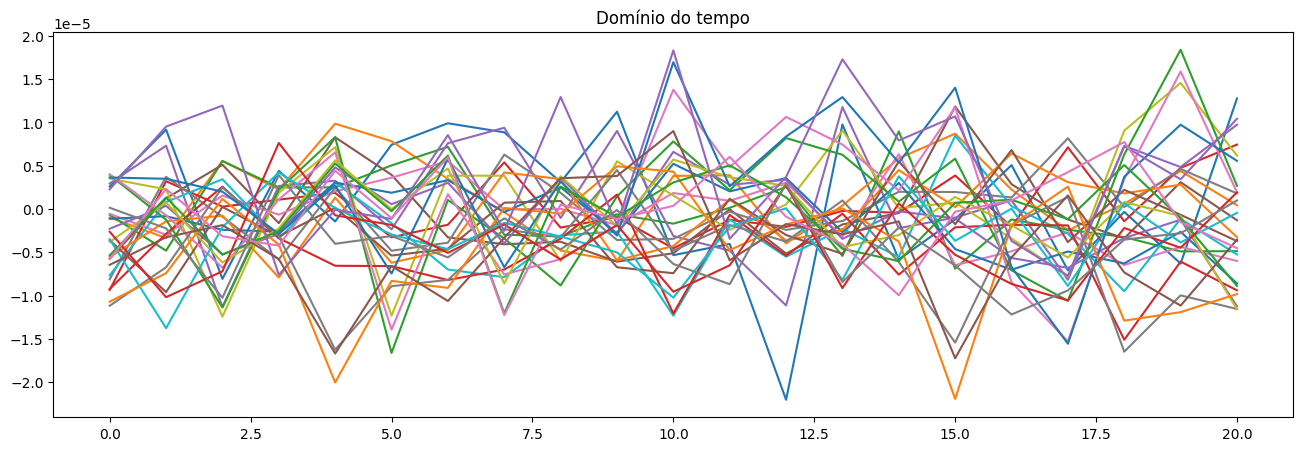

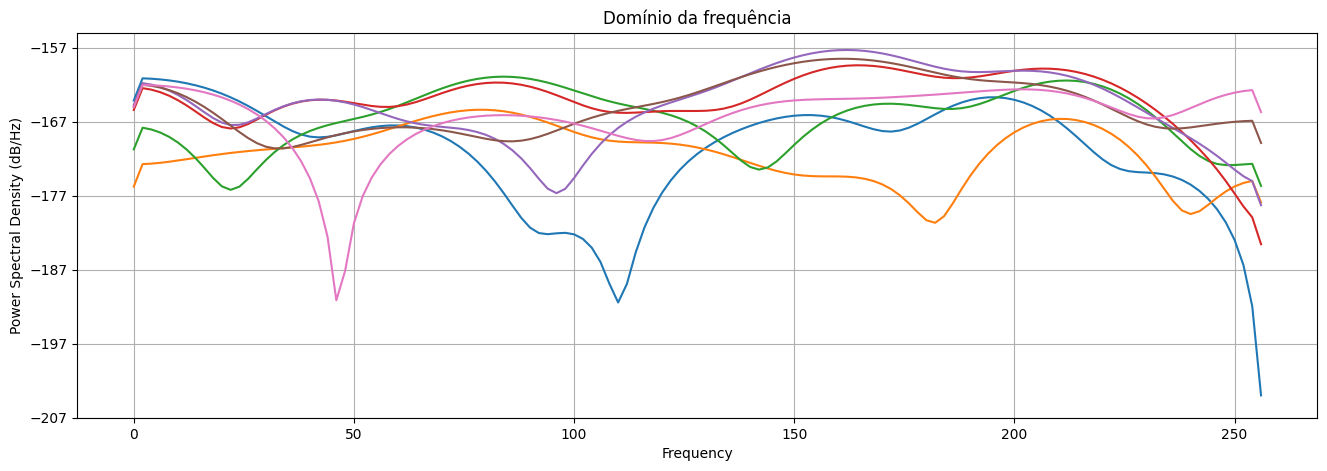

C:\Users\caio-\AppData\Local\Temp\ipykernel_24288\1856478781.py:13: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=21).
  plt.specgram(data[i,:], Fs=512)


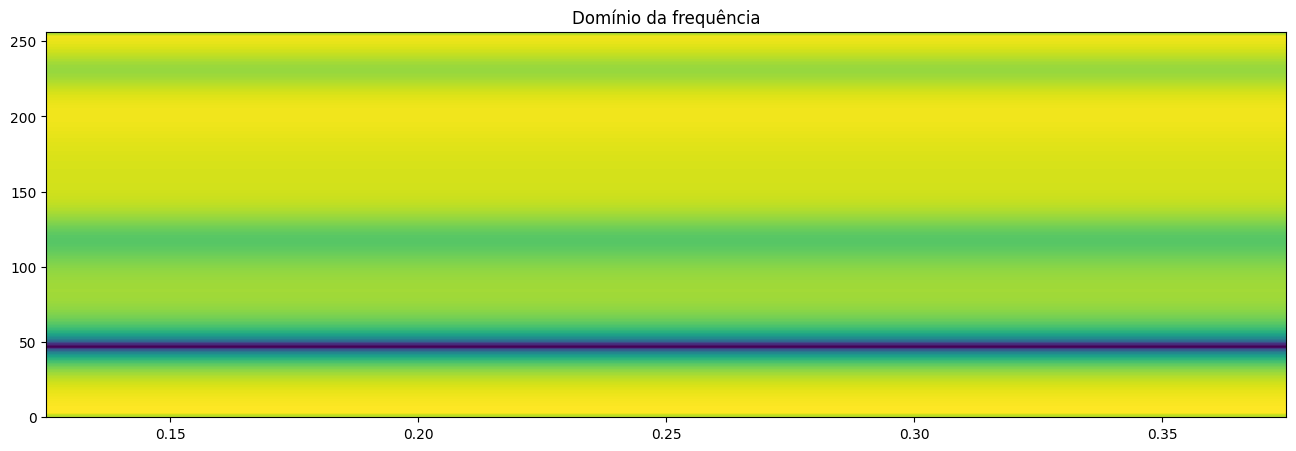

In [7]:
rcParams['figure.figsize'] = [16., 5.]
print_graphs(data)

Para facilitar o trabalho de visualização dos dados nas faixas de frequência de trabalho, vamos utilizar a ferramenta `MNE`:

In [8]:
# criação de um objeto "info"
n_channels = 1
sfreq = 512
ch_names = ['Oz']
ch_types = ['eeg']
info = mne.create_info(ch_names, sfreq=sfreq, ch_types=ch_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: Oz
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 512.0 Hz
>

In [9]:
from sklearn.preprocessing import LabelEncoder

labels = np.load("datasets/avi/single/labels_sub1.npy")[0]
print(labels, labels.shape)

[[10. ]
 [10. ]
 [10. ]
 [ 6.5]
 [ 6.5]
 [ 6.5]
 [ 6. ]
 [ 6. ]
 [ 6. ]
 [ 7.5]
 [ 7.5]
 [ 7.5]
 [ 7. ]
 [ 7. ]
 [ 7. ]
 [ 8.2]
 [ 8.2]
 [ 8.2]
 [ 9.3]
 [ 9.3]
 [ 9.3]] (21, 1)


In [10]:
for i in range(0,4):
    data = np.load("datasets/avi/single/data_sub1.npy")[i]
    data_correct = data.reshape(data.shape[0], 1, data.shape[1])
    
    # Load labels and encode them
    labels = np.load("datasets/avi/single/labels_sub1.npy")[0].flatten()
    le = LabelEncoder()
    events = np.column_stack((
        np.array(range(len(labels))),
        np.zeros(21, dtype=int),
        le.fit_transform(labels))
    )
    
    event_dict = {'6': 0, '6.5': 1, '7': 2, '7.5': 3, '8.2': 4, '9.3': 5, '10': 6}
    
    # Create MNE EpochsArray
    mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)
    
    # Save the MNE Epochs data to a FIF file
    mne_data.save('datasets/avi/single/sub1_run' + str(i+1) + '-raw.fif', overwrite=True)

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Overwriting existing file.
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Overwriting existing file.
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Overwriting existing file.


Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Overwriting existing file.


C:\Users\caio-\AppData\Local\Temp\ipykernel_24288\1332526685.py:20: RuntimeWarning: This filename (datasets/avi/single/sub1_run1-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mne_data.save('datasets/avi/single/sub1_run' + str(i+1) + '-raw.fif', overwrite=True)
C:\Users\caio-\AppData\Local\Temp\ipykernel_24288\1332526685.py:20: RuntimeWarning: This filename (datasets/avi/single/sub1_run2-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mne_data.save('datasets/avi/single/sub1_run' + str(i+1) + '-raw.fif', overwrite=True)
C:\Users\caio-\AppData\Local\Temp\ipykernel_24288\1332526685.py:20: RuntimeWarning: This filename (datasets/avi/single/sub1_run3-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mne_data.save('datasets/avi/single/s

In [11]:
import mne
import numpy as np
from sklearn.preprocessing import LabelEncoder
all_epochs = []

for i in range(0, 4):
    data = np.load("datasets/avi/single/data_sub1.npy")[i]
    data_correct = data.reshape(data.shape[0], 1, data.shape[1])
    
    labels = np.load("datasets/avi/single/labels_sub1.npy")[0].flatten()
    le = LabelEncoder()
    events = np.column_stack((
        np.array(range(len(labels))),
        np.zeros(21, dtype=int),
        le.fit_transform(labels))
    )
    
    event_dict = {'6': 0, '6.5': 1, '7': 2, '7.5': 3, '8.2': 4, '9.3': 5, '10': 6}
    
    mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)
    
    all_epochs.append(mne_data)

combined_epochs = mne.concatenate_epochs(all_epochs)

combined_epochs.save('datasets/avi/single/sub1_combined-raw.fif', overwrite=True)

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata


21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
84 matching events found
No baseline correction applied


C:\Users\caio-\AppData\Local\Temp\ipykernel_24288\3669913664.py:26: RuntimeWarning: This filename (datasets/avi/single/sub1_combined-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  combined_epochs.save('datasets/avi/single/sub1_combined-raw.fif', overwrite=True)


Need more than one channel to make topography for eeg. Disabling interactivity.



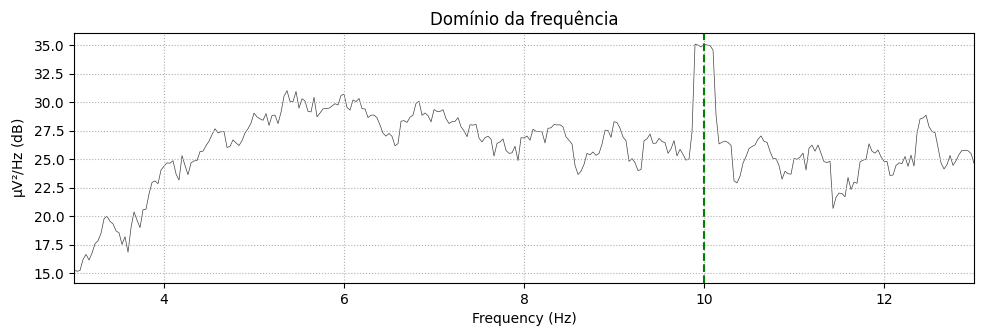

Need more than one channel to make topography for eeg. Disabling interactivity.



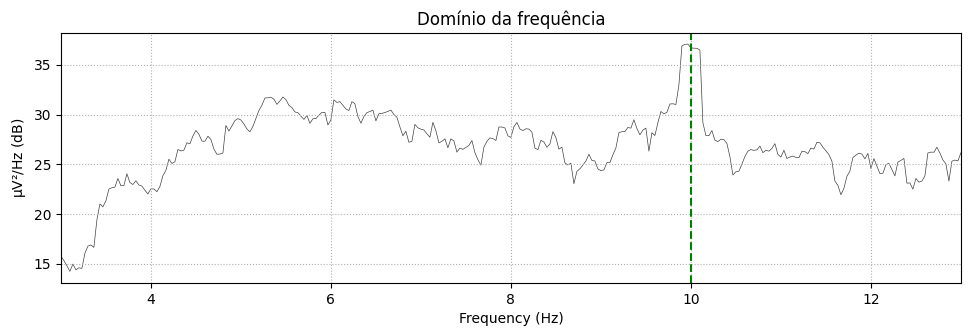

Need more than one channel to make topography for eeg. Disabling interactivity.



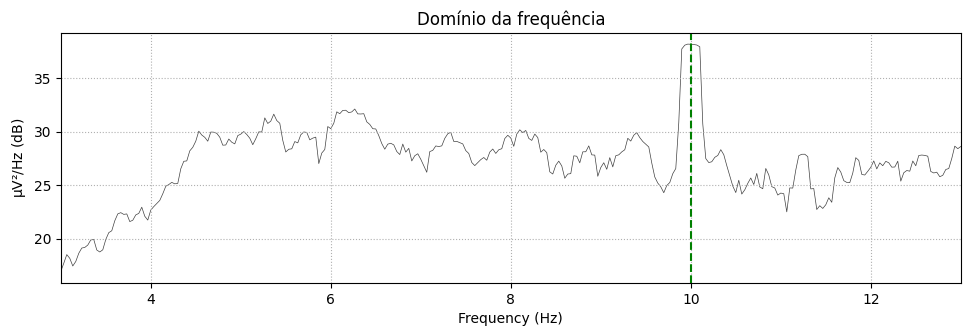

Need more than one channel to make topography for eeg. Disabling interactivity.



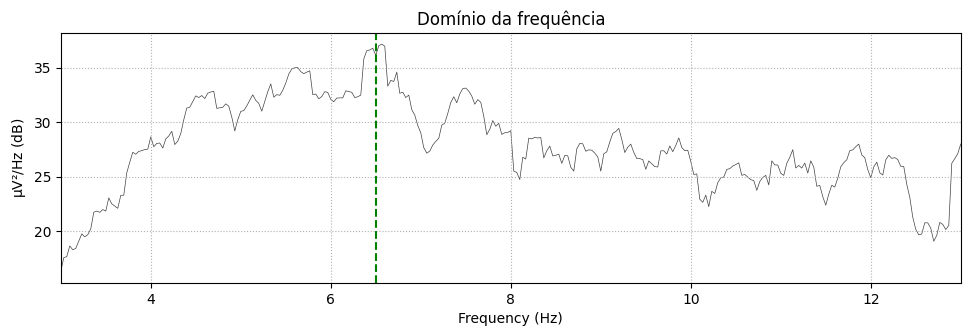

Need more than one channel to make topography for eeg. Disabling interactivity.



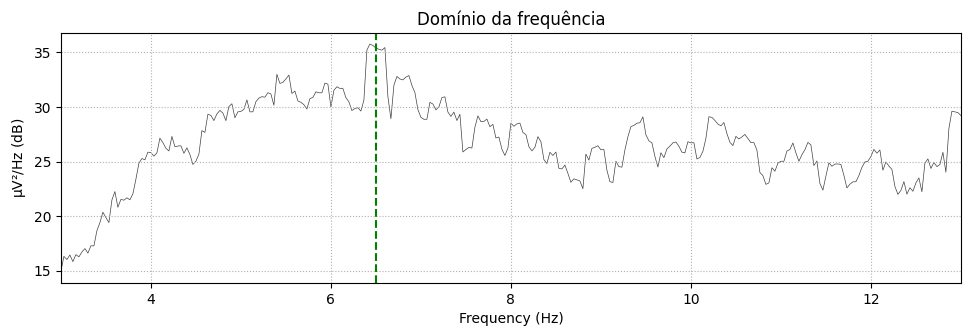

Need more than one channel to make topography for eeg. Disabling interactivity.



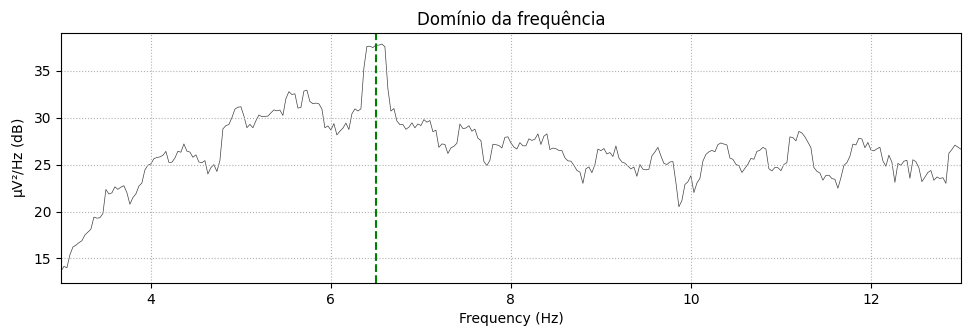

Need more than one channel to make topography for eeg. Disabling interactivity.



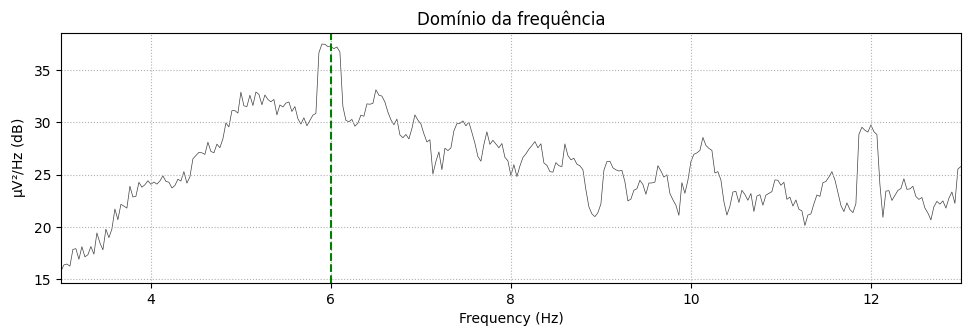

Need more than one channel to make topography for eeg. Disabling interactivity.



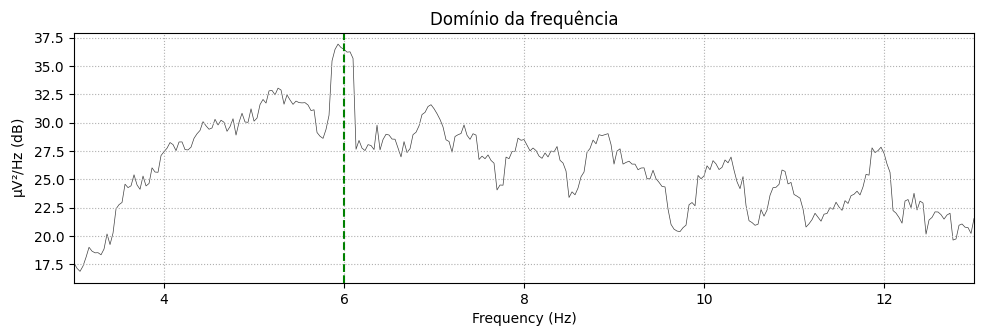

Need more than one channel to make topography for eeg. Disabling interactivity.



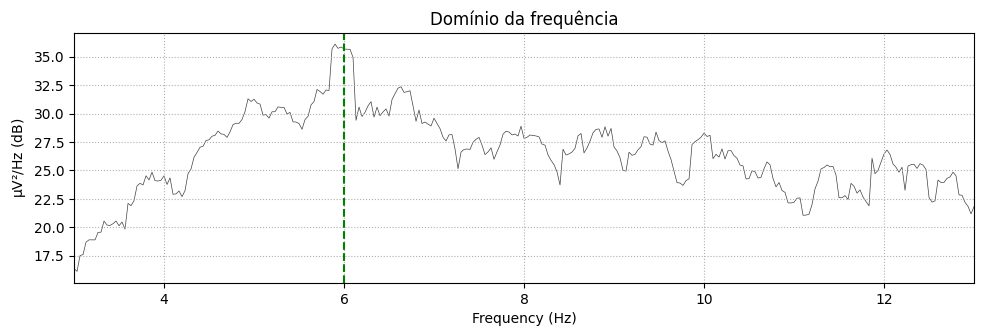

Need more than one channel to make topography for eeg. Disabling interactivity.



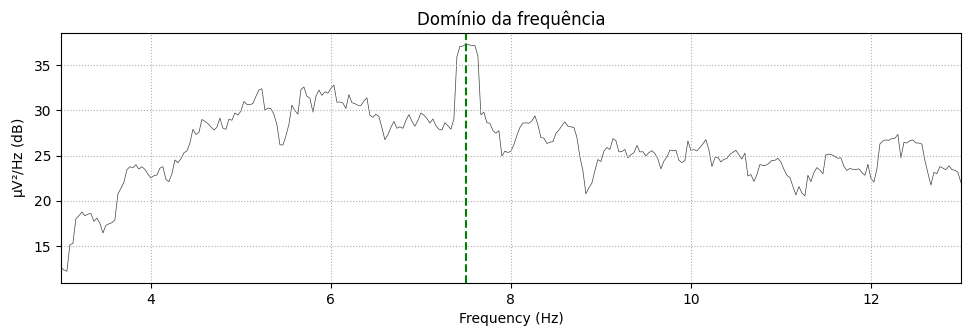

Need more than one channel to make topography for eeg. Disabling interactivity.



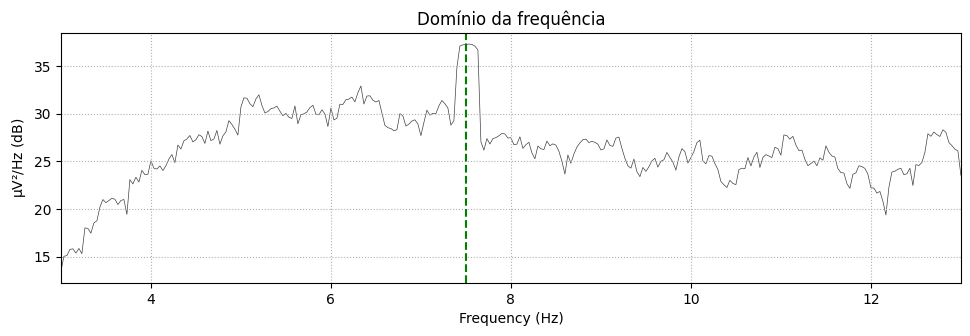

Need more than one channel to make topography for eeg. Disabling interactivity.



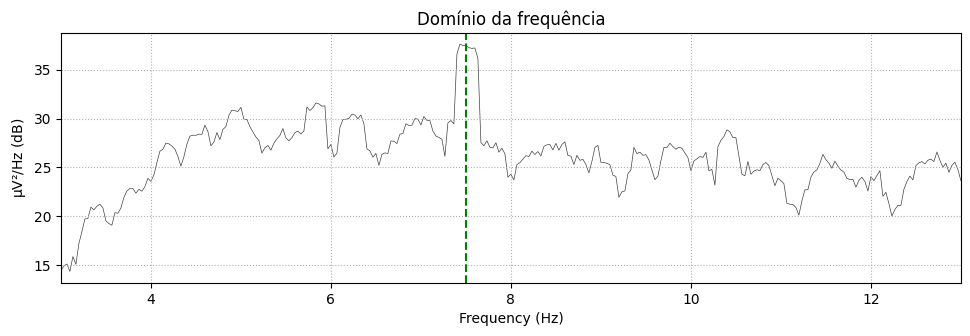

Need more than one channel to make topography for eeg. Disabling interactivity.



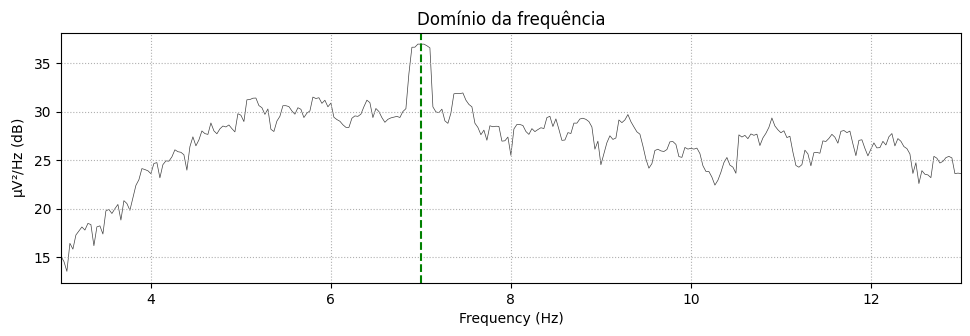

Need more than one channel to make topography for eeg. Disabling interactivity.



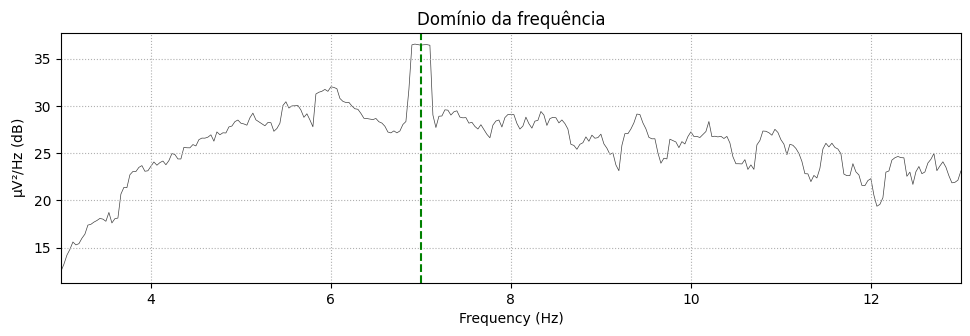

Need more than one channel to make topography for eeg. Disabling interactivity.



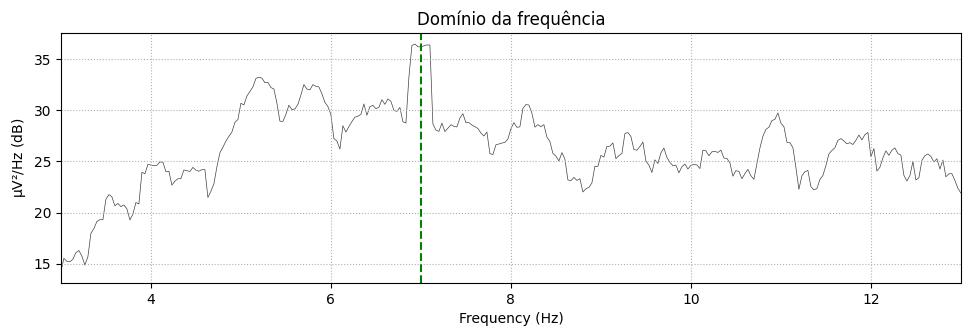

Need more than one channel to make topography for eeg. Disabling interactivity.



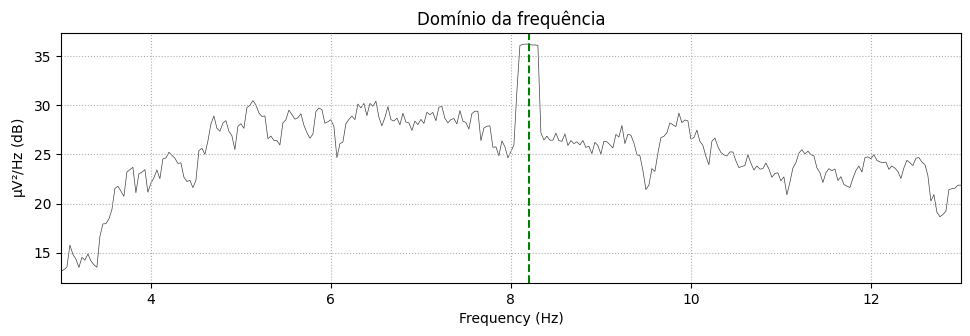

Need more than one channel to make topography for eeg. Disabling interactivity.



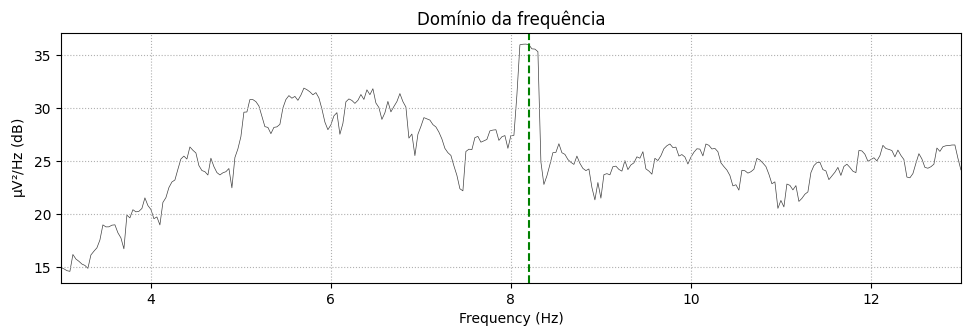

Need more than one channel to make topography for eeg. Disabling interactivity.



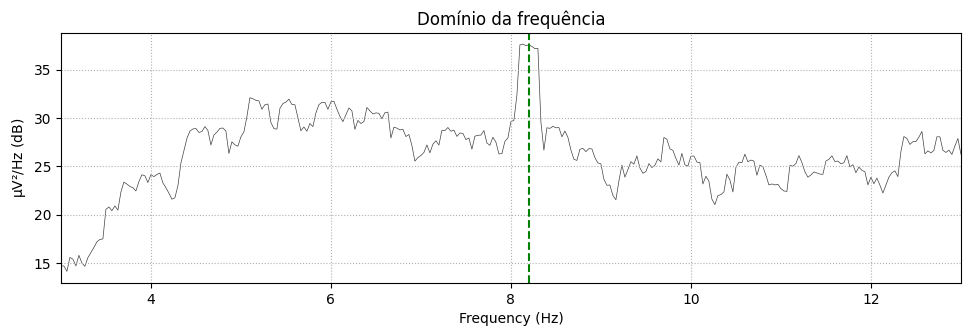

Need more than one channel to make topography for eeg. Disabling interactivity.



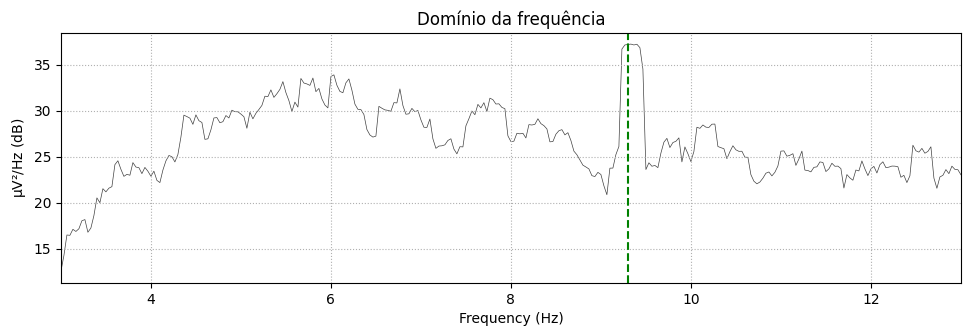

Need more than one channel to make topography for eeg. Disabling interactivity.



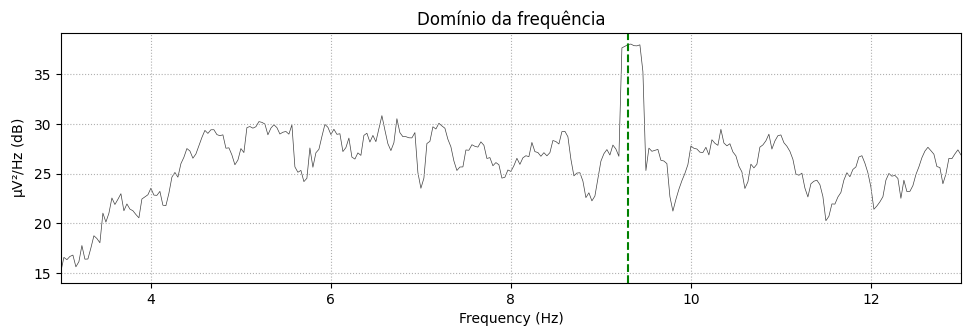

Need more than one channel to make topography for eeg. Disabling interactivity.



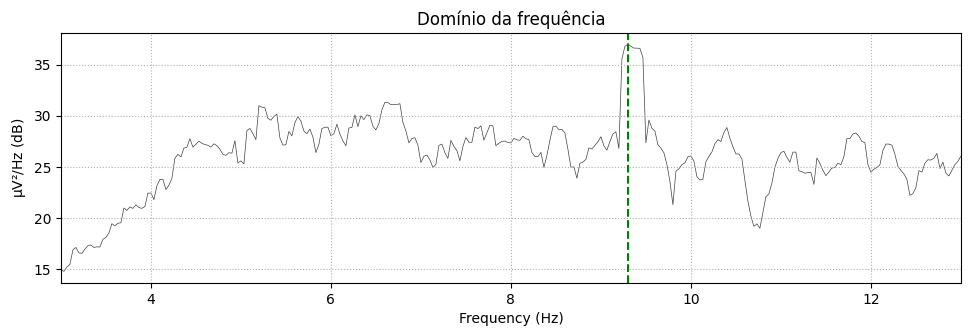

In [12]:
import warnings
warnings.filterwarnings('ignore')

for i in range(len(mne_data)):
    # view = mne_data.compute_psd(method='welch', fmin=3, fmax=13)
    view = mne_data[i].compute_psd(method='multitaper', fmin=3, fmax=13,
                                   verbose=False)
    view.plot(show=False)
    print()
    plt.title('Domínio da frequência')
    plt.axvline(x=float(list(mne_data[i].event_id)[0]), linestyle='--',
                color='green')
    plt.show()
print()


### Tarefas

- Estudar e utilizar os exemplos já apresentados no repositório `tutoriais` e criar o objeto `mne.EpochsArray` para os dados *single* e *multi-target* (`AVI dataset`);
- Estudar documentos MNE para realizar a aplicação dos filtros temporais a partir de objetos `mne.EpochArray` (sempre verificando as frequências utilizadas como targets dos `datasets`). Isto também para os dados *single* e *multi-target* (`AVI dataset`);
- **Ótimo**: elaborar toda a aplicação já realizada até o ponto anterior para o *dataset* `Beta`.

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using matplotlib as 2D backend.
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


IndexError: index 4 is out of bounds for axis 0 with size 4

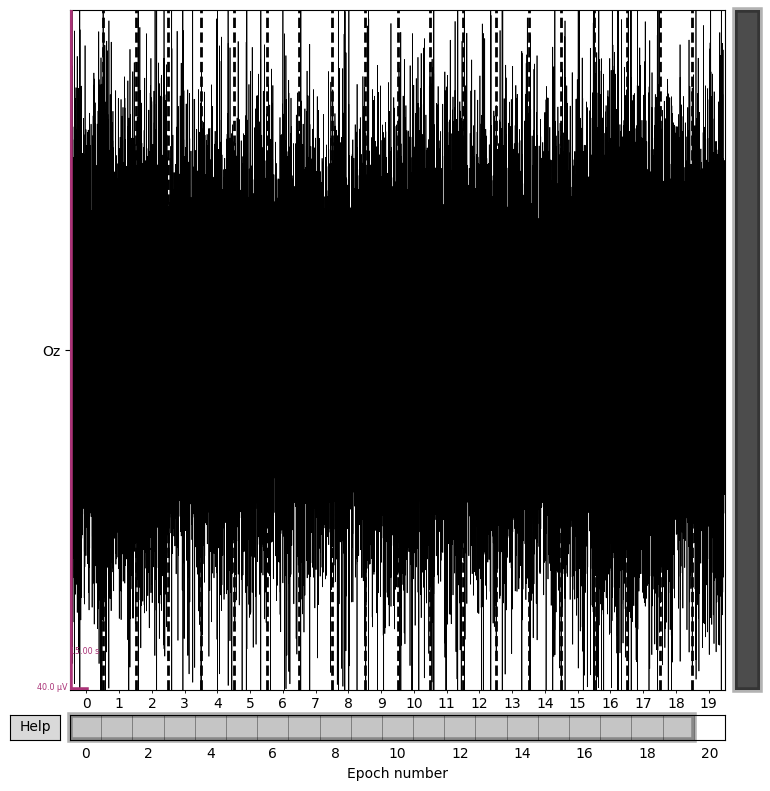

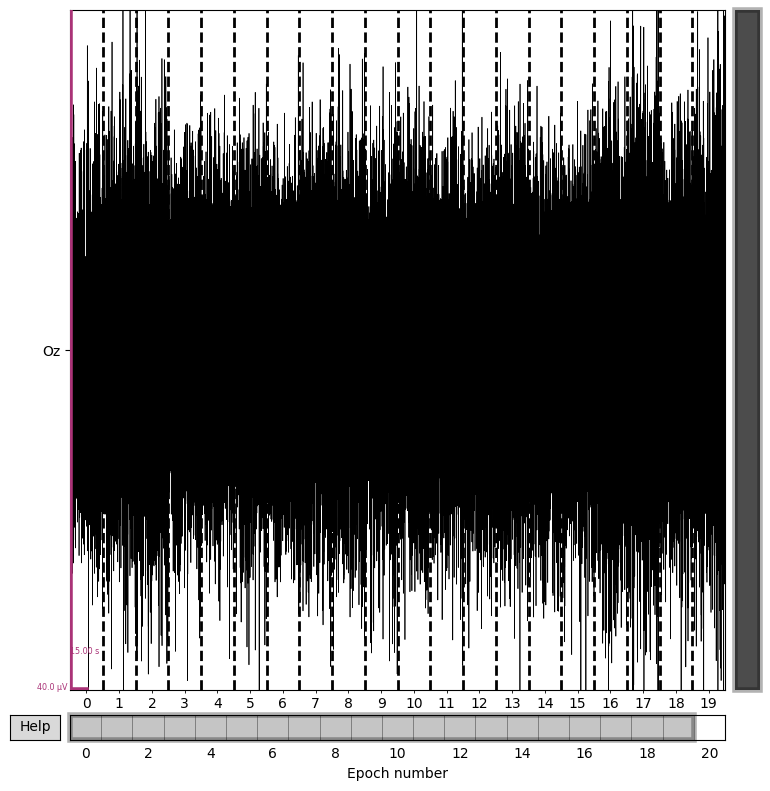

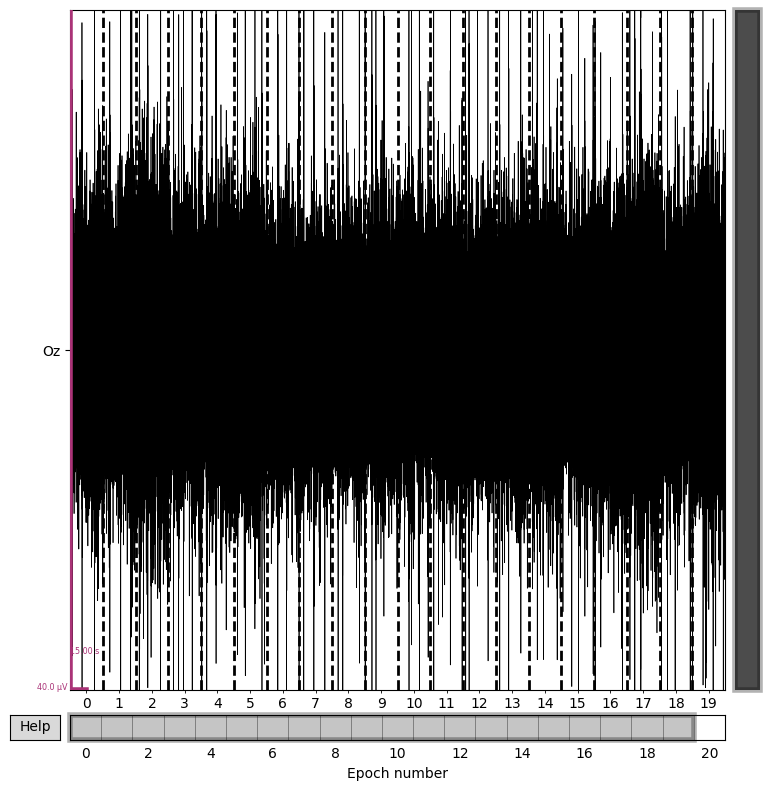

In [13]:
mne_list = []
for i in range(1,5):
    labels = np.load("datasets/avi/single/labels_sub1.npy")[0].flatten()
    data = np.load("datasets/avi/single/data_sub1.npy")[i]

    data_correct = data.reshape(data.shape[0], 1, data.shape[1])
    le = LabelEncoder()
    events = np.column_stack((
        np.array(range(len(labels))),
        np.zeros(21, dtype=int),
        le.fit_transform(labels))
    )
    event_dict = {'6':0, '6.5':1, '7':2, '7.5':3, '8.2':4, '9.3':5, '10':6}
    mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)
    mne_data.plot(show=False)


Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


C:\Users\caio-\AppData\Local\Temp\ipykernel_5644\1218970574.py:17: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  mne_data.plot(show=True)


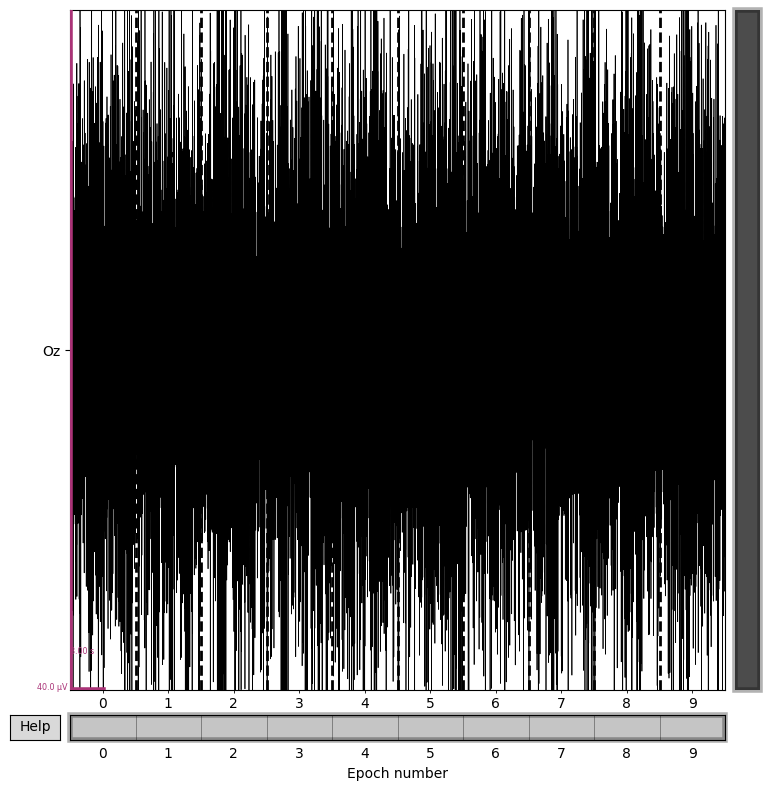

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


C:\Users\caio-\AppData\Local\Temp\ipykernel_5644\1218970574.py:17: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  mne_data.plot(show=True)


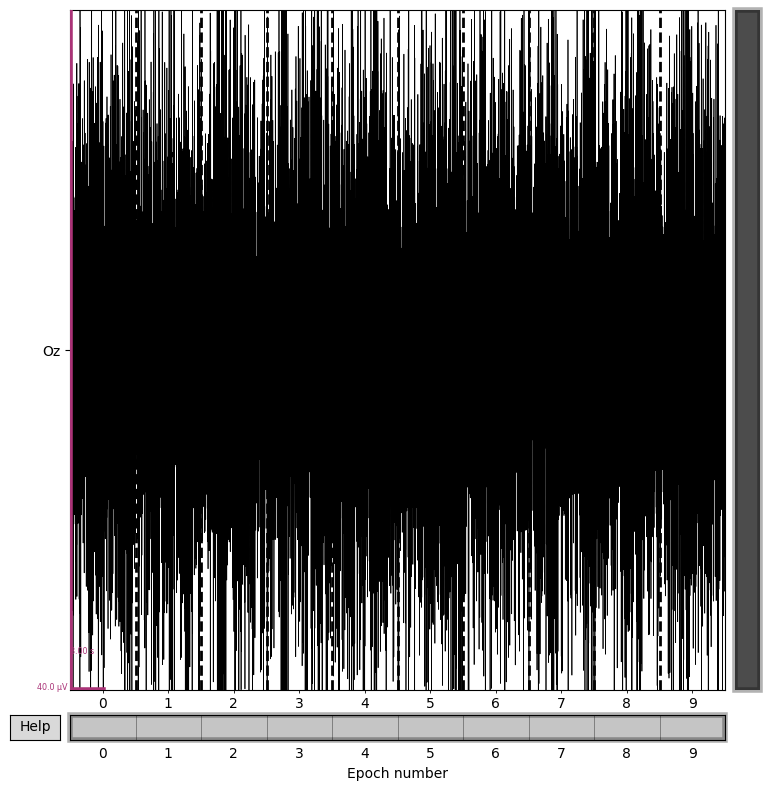

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


C:\Users\caio-\AppData\Local\Temp\ipykernel_5644\1218970574.py:17: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  mne_data.plot(show=True)


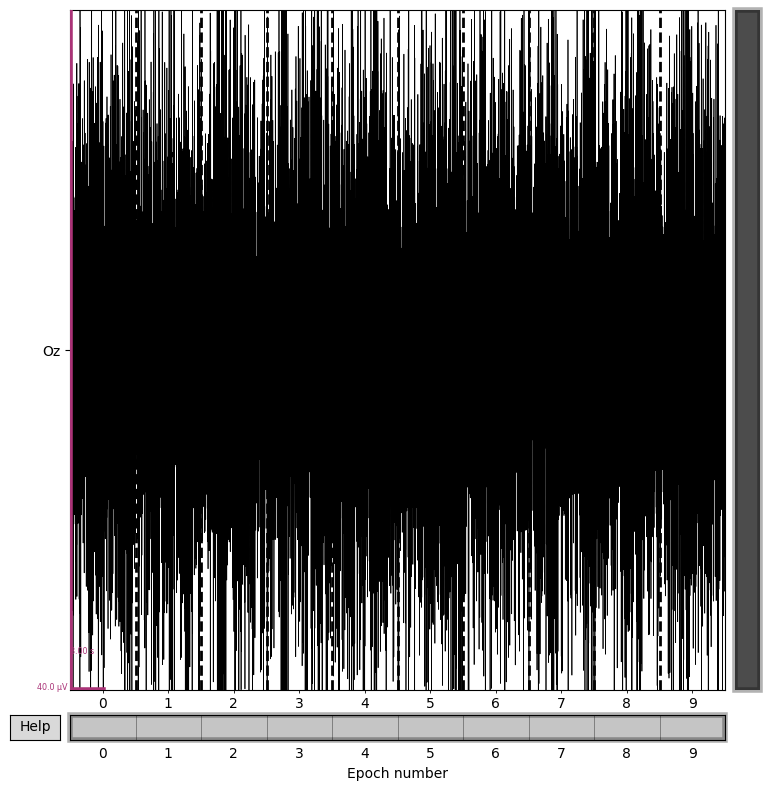

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


C:\Users\caio-\AppData\Local\Temp\ipykernel_5644\1218970574.py:17: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  mne_data.plot(show=True)


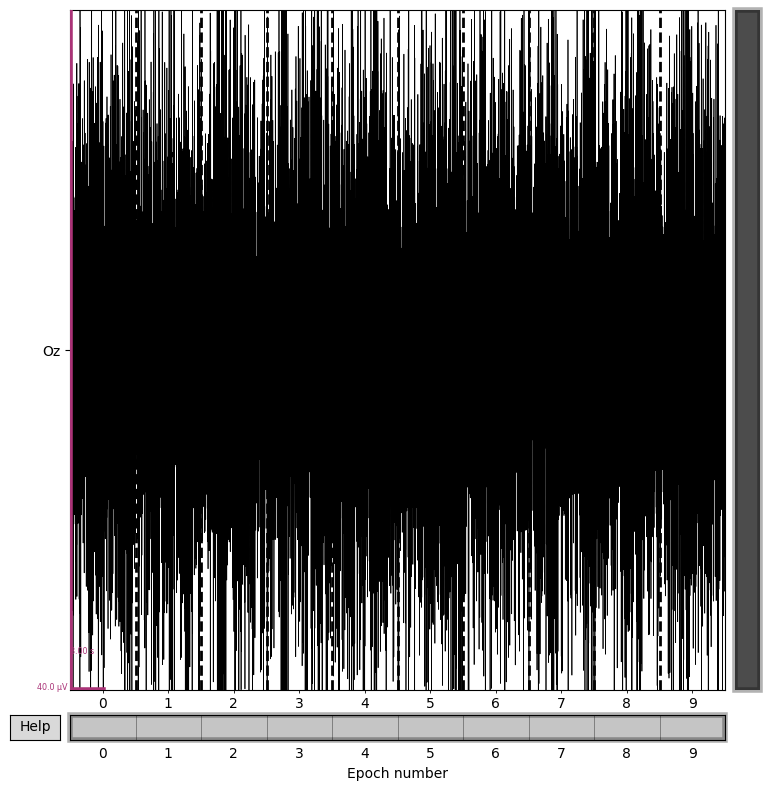

In [ ]:
mne_list = []
for i in range(1,5):
    labels = np.load("datasets/avi/multi/labels_sub1.npy")[0].flatten()
    data = np.load("datasets/avi/multi/data_sub1.npy")[0]


    data = data.T
    data_correct = data.reshape(data.shape[0], 1, data.shape[1])
    le = LabelEncoder()
    events = np.column_stack((
        np.array(range(len(labels))),
        np.zeros(10, dtype=int),
        le.fit_transform(labels))
    )
    event_dict = {'6':0, '7':1,'7.5': 2, '8.2':3}
    mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)
    mne_data.plot(show=True) 